In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
bank = pd.read_csv("bank-full-cleaned.csv")

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank['default'] = bank['default'].map( {'yes':1 ,'no':0}) 

In [9]:
bank['housing'] = bank['housing'].map( {'yes':1 ,'no':0}) 

In [10]:
bank['loan'] = bank['loan'].map(  {'yes':1 ,'no':0}) 

In [11]:
bank['y'] = bank['y'].map( {'yes':1 ,'no':0}) 

In [12]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [13]:
#Dropping unknow values form dataset
bank.drop(bank[bank['job'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['marital'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['education'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['default'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['housing'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['loan'] == 'unknown' ].index , inplace=True)

In [14]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
bank.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

In [16]:
cNoLoan = len(bank[bank.y == 0])
cHaveLoan = len(bank[bank.y == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((cNoLoan / (len(bank.y))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((cHaveLoan / (len(bank.y))*100)))

Percentage of Customer can't Have a Loan: 88.38%
Percentage of Customer can Have a Loan: 11.62%


In [17]:
bank.groupby('y').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.669679,0.019229,1297.333176,0.587289,0.173792,15.900529,221.115949,2.838704,36.709394,0.507230
1,41.481777,0.009560,1785.043019,0.373232,0.094204,15.116710,541.191994,2.145987,68.492731,1.175065


In [18]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank[i].skew()))

Skewness age : 0.6978356364509636
Skewness duration : 3.1701799697784785
Skewness campaign : 4.7924941810208885
Skewness pdays : 2.608337543002269
Skewness previous : 42.08877792244101
Skewness balance : 8.400120937754398


In [26]:
import math
def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 10)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

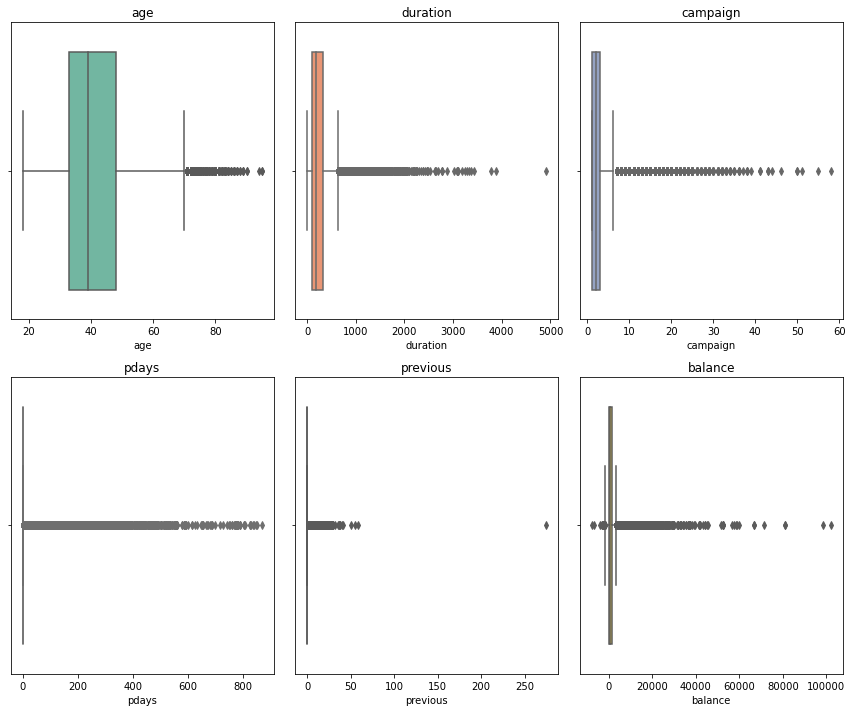

In [27]:
multiple_eda_continuous(bank, cols)

# Outlier analysis

In [19]:
# IQR score
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]
print(bank_out.shape)

age           15.0
default        0.0
balance     1341.0
housing        1.0
loan           0.0
day           13.0
duration     215.0
campaign       2.0
pdays          0.0
previous       0.0
y              0.0
dtype: float64
(20327, 17)


<ipython-input-19-7e24bc2e2e47>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-19-7e24bc2e2e47>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]


In [21]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank_out[i].skew()))

Skewness age : 0.41416767090481166
Skewness duration : 1.0790034845002618
Skewness campaign : 1.1216634134080552
Skewness pdays : 0
Skewness previous : 0
Skewness balance : 1.3639638827560565


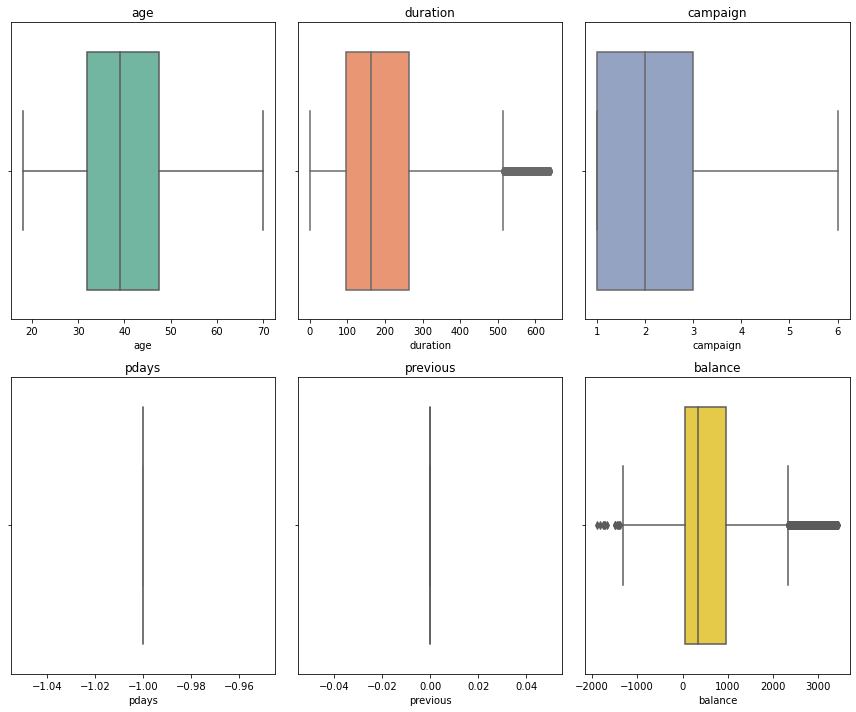

In [29]:
# Check outliers after flooring and capping using IQR
multiple_eda_continuous(bank_out, cols)

In [30]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [31]:
bank_out

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,28,services,single,tertiary,0,441,0,0,cellular,8,nov,106,1,-1,0,unknown,0
45161,31,management,married,tertiary,0,720,1,0,cellular,9,nov,94,3,-1,0,unknown,0
45167,48,admin.,married,secondary,0,178,0,0,cellular,10,nov,228,1,-1,0,unknown,0
45198,37,management,married,tertiary,0,1428,0,0,cellular,16,nov,333,2,-1,0,unknown,0


# converting text data columns using label encoder


In [32]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [58]:
month = list(bank.month)
values = array(month)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
month_list = list(integer_encoded)

In [59]:
bank.insert(loc=11, column="month_enc", value = month_list)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [60]:
job = list(bank.job)
values = array(job)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
job_list = list(integer_encoded)

In [61]:
bank.insert(loc=2, column="job_enc", value = job_list)
bank

,age,job,job_enc,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [62]:
marital = list(bank.marital)
values = array(marital)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
marital_list = list(integer_encoded)

In [63]:
bank.insert(loc=4, column="marital_enc", value = marital_list)
bank

,age,job,job_enc,marital,marital_enc,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [64]:
education = list(bank.education)
values = array(education)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
education_list = list(integer_encoded)

In [65]:
bank.insert(loc=6, column="education_enc", value = education_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,telephone,17,nov,9,508,4,-1,0,unknown,0


In [66]:
contact = list(bank.contact)
values = array(contact)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
contact_list = list(integer_encoded)

In [67]:
bank.insert(loc=12, column="contact_enc", value = contact_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact_enc,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,2,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,2,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,2,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,2,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,2,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,0,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,0,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,0,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,1,17,nov,9,508,4,-1,0,unknown,0


In [68]:
poutcome = list(bank.poutcome)
values = array(poutcome)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
poutcome_list = list(integer_encoded)

In [69]:
bank.insert(loc=21, column="poutcome_enc", value = poutcome_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,day,month,month_enc,duration,campaign,pdays,previous,poutcome,poutcome_enc,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,5,may,8,261,1,-1,0,unknown,3,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,5,may,8,151,1,-1,0,unknown,3,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,5,may,8,76,1,-1,0,unknown,3,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,5,may,8,139,1,-1,0,unknown,3,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,5,may,8,217,1,-1,0,unknown,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,17,nov,9,977,3,-1,0,unknown,3,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,17,nov,9,456,2,-1,0,unknown,3,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,17,nov,9,1127,5,184,3,success,2,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,17,nov,9,508,4,-1,0,unknown,3,0


In [70]:
bank.columns

Index(['age', 'job', 'job_enc', 'marital', 'marital_enc', 'education',
       'education_enc', 'default', 'balance', 'housing', 'loan', 'contact',
       'contact_enc', 'day', 'month', 'month_enc', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'poutcome_enc', 'y'],
      dtype='object')

In [71]:
bank = bank.drop(['job', 'marital', 'education', 'month', 'contact', 'poutcome'], axis = 1)

In [72]:
bank

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [73]:
bank.columns

Index(['age', 'job_enc', 'marital_enc', 'education_enc', 'default', 'balance',
       'housing', 'loan', 'contact_enc', 'day', 'month_enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_enc', 'y'],
      dtype='object')

# XGB classifier (Boosting algorithm)

In [74]:
!pip install xgboost

You should consider upgrading via the 'c:\users\prani\anaconda3\python.exe -m pip install --upgrade pip' command.


In [85]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [76]:
x=bank[bank.columns[0:16]]
x

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [77]:
y=bank["y"]
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43193, dtype: int64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [79]:
# XGBOOST MODEL
XG_classifier = XGBClassifier(random_state = 0)
XG_classifier.fit(x_train, y_train)

[20:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prani\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
cf = confusion_matrix(y_test,predictions)
cf

array([[11051,   394],
       [  780,   733]], dtype=int64)

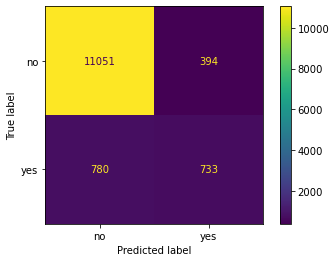

In [87]:
metrics.plot_confusion_matrix(XG_classifier, x_test, y_test, display_labels=['no', 'yes'])

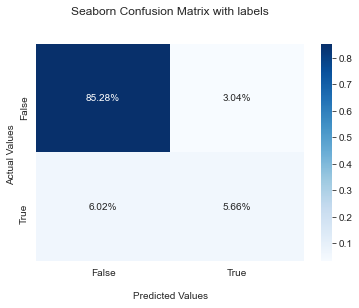

In [101]:
ax = sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [88]:
accuracy_score(y_test,predictions)

0.9093995987035036

In [89]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11445
           1       0.65      0.48      0.56      1513

    accuracy                           0.91     12958
   macro avg       0.79      0.73      0.75     12958
weighted avg       0.90      0.91      0.90     12958



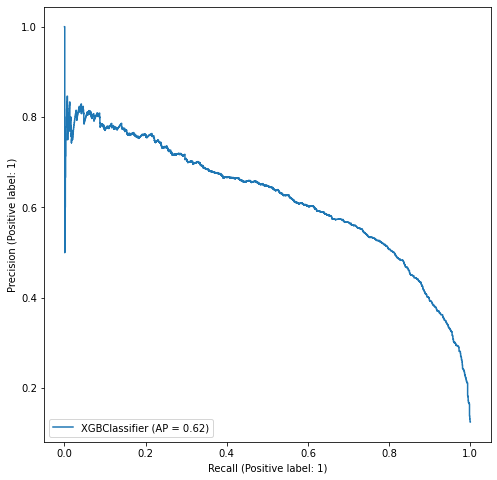

In [91]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(XG_classifier, x_test, y_test, ax=ax)

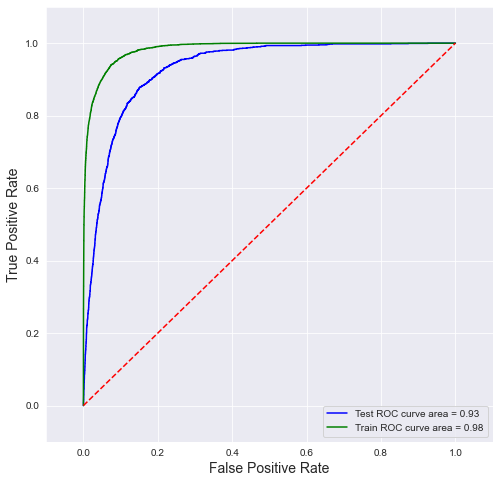

In [95]:
sns.set_style('darkgrid')
preds_train = XG_classifier.predict(x_train)
# calculate prediction probability
prob_train = np.squeeze(XG_classifier.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(XG_classifier.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

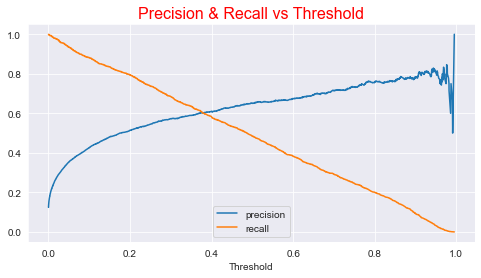

In [96]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

In [98]:
# Entropy loss
cross_entropy_loss = metrics.log_loss(y_test, prob_test)
cross_entropy_loss

0.205896050920936